### Linear Regression <br><br>
Linear regression shows the relation between two variables. One dependent (y), one independent (x).<br>
The models built through linear regression are able to predict y based on x to certain degree. <br>
The variation of the models is the degree to which a model is accuratly able to predict an outcome.

### The Steps <br>
The first step in our data processing is importing all relevant libraries.

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn as sk
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


The dataset that we will use is the dataset about Mashable articles, let's import it and see what we're working with.

In [10]:
df = pd.read_csv('mashable.csv')
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


To have a bit more of an overiew, we print the info of our dataset. <br>
This gives us a nice table with all relevant information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24998
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24999 non-null  int64  
 1   url                            24999 non-null  object 
 2   n_tokens_title                 24999 non-null  int64  
 3   n_tokens_content               24999 non-null  int64  
 4   num_imgs                       24999 non-null  int64  
 5   num_videos                     24999 non-null  int64  
 6   average_token_length           24999 non-null  float64
 7   data_channel_is_lifestyle      24999 non-null  int64  
 8   data_channel_is_entertainment  24999 non-null  int64  
 9   data_channel_is_bus            24999 non-null  int64  
 10  data_channel_is_socmed         24999 non-null  int64  
 11  data_channel_is_tech           24999 non-null  int64  
 12  data_channel_is_world          24999 non-null 

The next step is to isolate 5 variables and split these into our training and testing set. <br>
We start of with isolating the relevant variables. We pick 5 different ones. <br>
It is important to pick variables that are not too strongly corellated with each other. <br>
Doing so would cause multicollinearity. It is interesting to see if weekday vs. weekend day makes a difference<br>
For this reason we pick only a single data channel and a single 'day of the week'.

In [12]:
df_weekend = df[['n_tokens_content', 'data_channel_is_socmed', 'num_imgs', 'num_videos', 'is_weekend', 'shares_log']]

#The df_sub subset was a practise run but did not get used in the end. 
#The .loc function was nice to play around with
df_sub = df.loc[:,'n_tokens_content':'is_weekend']
df_sub = df_sub.drop(['average_token_length'], axis=1)

y = df_weekend['shares_log'] #We need to take out the rating as our Y-variable
X = df_weekend.loc[:,'n_tokens_content':'is_weekend'] #this stores the movie names in the column names, so we don't lose track of them later
df_weekend.head()

,n_tokens_content,data_channel_is_socmed,num_imgs,num_videos,is_weekend,shares_log
0,821,0,12,0,0,3.322219
1,489,0,6,0,0,2.437751
2,131,0,0,1,0,3.176091
3,556,0,2,0,0,3.301030
4,880,0,18,0,0,3.778151


Now for splitting the dataset! We use the built in function from sk-learn

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.head()

,n_tokens_content,data_channel_is_socmed,num_imgs,num_videos,is_weekend
3272,229,0,12,0,0
14858,1750,0,1,1,0
6238,476,1,1,0,0
10796,352,0,1,0,0
20476,612,1,1,0,0


We will let the model learn with our train set and print the coefficient straight after.

In [14]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train)
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-0.000016,n_tokens_content
0.140128,data_channel_is_socmed
0.004359,num_imgs
0.004685,num_videos
0.130754,is_weekend


Some rough conclusions that we might make from the table above is that lenghtier articles (with a higher word count)<br>
get shared less than shorter articles. However, the relation is weak to say the least. <br>
Articles concerning social media (socmed) have an increased likelihood of getting shared. The socmed variable is the  strongest variable. <br> <br>
The number of both videos and images featured in articles have a weak, yet positive effect on the number of shares an article can potentially reach. <br><br>
The last variable is concerned with the day an article is published. An important note to consider is that while a weekend release of an article has a positive effect on the share potential, we have no comparison in this dataframe to weekdays/other days. Drawing a final conclusion on optimal day to release is not possible here.

In [15]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.026503180718004504

Our R squared is roughly 0.027, which translates to 2.7%. Seemingly low. We would be able to play around with the variables to optimize our model. However, considering the amount of variables and their inaccuracy it won't be improving by a significant amount.

In [16]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.40204443339095863

The MSRE is 0.4, which is pretty decent for this data set. It describes the amount of error occuring in the predictive model (Is this right?)

In [17]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1]
b3 = lm.coef_[2]
b4 = lm.coef_[3]
b5 = lm.coef_[4]
print(f"The regression line is equal to y = {b0:.3f} + {b1 + b2 + b3 + b4 + b5:.6f}X")

The regression line is equal to y = 3.212 + 0.279911X


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


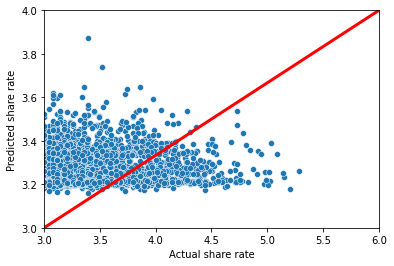

In [20]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual share rate')
plt.ylabel('Predicted share rate')
plt.xlim([3,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,4])
plt.plot([3, 6], [3, 4], color='red', lw=3) #Plot a diagonal length
plt.show()

The above plot describes the relation between predicted amounts of shares and the actual. <br>
A conclusion that can be derived is that the model has a difficulty with predicting highly shared articles. <br>
The model brings down the highest shared articles to a minimum, while bumping up the lowest shared articles. <br>
We can then conclude that the model is not accurate when it comes to the extremes of both ends. <br> <br>
Middle (mediumly) shared articles are more accurately predicted. This would make sense since the model attempts to normalize the distribution of the articles. 